In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import math
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df=pd.read_csv('medellin_tweets_labeled.csv', sep =',')

In [ ]:
def polarity(message):
    if(message==1):
        return('positive')
    else:
        return('negative')

df.dropna(inplace=True)
df['label']=df['sentiment'].apply(polarity)
df = df.rename(columns={'sentiment':'label','label':'sentiment'})


In [ ]:
df.head(20)

,full_text,label,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0,negative
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0,negative
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0,negative
3,@isamg6: La historia contará que en Medellín s...,0.0,negative
4,@funurbiano: Los del asalto a la fundidora de ...,0.0,negative
5,@Don_Patriota1: Me acabo d enterar que al Sena...,0.0,negative
6,@JoseMejiaCD: Abramos hilo de la abucheada tan...,0.0,negative
7,@Leo_uribista: ‼️Hermoso…así fue tratado en su...,1.0,positive
8,"@Nicols03804032: Hoy en el centro de Medellín,...",1.0,positive
9,Me parece súper bien el rechazo a Petro en #Me...,0.0,negative


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
feature_cols = ['label']
X = df[feature_cols] # Features
y = df.label 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
!pip install graphviz
!pip install pydotplus

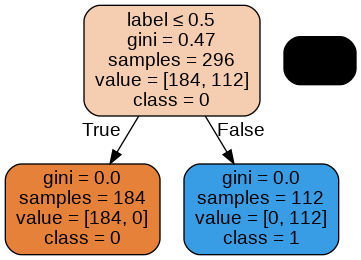

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())